# COSC 6380 - DATA ANALYTICS

## Assignment 2: Hypothesis Testing
### Author: Syed Izzat Ullah
### Date: 02/19/2024
# Hypothesis 1: Average monthly temperature in Corpus Christi follows a normal distribution.
* Null hypothesis (H0): Average monthly temperature in Corpus Christi follows a normal distribution.
* Alternative hypothesis (H1): Average monthly temperature in Corpus Christi does not follows a normal distribution

## Environment Setup

In [292]:
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

## Data Acquisition and Selection

The analysis considers average monthly temperatures in Corpus Christi, Texas, from January 1979 to February 2024.
Daily maximum temperature data for the years 1979-2024 was obtained from the National Oceanic and Atmospheric Administration (NOAA).
Data specific to the Corpus Christi station was extracted to ensure the analysis reflects local temperature patterns.


In [293]:
url_template = "http://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_temp/tmax.{}.nc"

In [294]:
station_lon = 262.75  # Longitude of Corpus Christi station   262.75
station_lat = 27.75   # Latitude of Corpus Christi station    27.75

In [295]:
data = []
for year in range(1979, 2025):
    url = url_template.format(year)
    
    # Load data using xarray
    dataset = xr.open_dataset(url)
    
    # Select data for Corpus Christi station
    corpus_christi_data = dataset.sel(lon=station_lon, lat=station_lat, method='nearest')
    
    # Extract temperature data
    max_temp = corpus_christi_data['tmax']
    
    # Convert xarray to pandas DataFrame
    df = max_temp.to_pandas().reset_index()
    
    # Add year column
    df['year'] = year
    
    # Append data for each year to a list
    data.append(df)

In [296]:
# Concatenate DataFrames
combined_df = pd.concat(data, ignore_index=True)

# Sorting by date
combined_df = combined_df.sort_values(by=['year', 'time'])
combined_df = combined_df.rename(columns={0: 'tmax'}) #combined_df has temperature values in the "0th" column, here we just rename it to 'tmax'

In [297]:
# Since, it takes significant time to parse the data through the URL, therefore, once parsed I then saved it in a csv file to avoid delay in the future
# combined_df.to_csv("combined_df.csv", index=False) #uncommmend this line only if you wanna save the data

Let's see whats in our DataFrames

In [298]:
print(combined_df.columns)
print(combined_df.info())
print(combined_df['tmax'].describe())

Index(['time', 'tmax', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    16496 non-null  datetime64[ns]
 1   tmax    16472 non-null  float32       
 2   year    16496 non-null  int64         
dtypes: datetime64[ns](1), float32(1), int64(1)
memory usage: 322.3 KB
None
count    16472.000000
mean        27.783087
std          6.646760
min         -1.158633
25%         24.126266
50%         29.053896
75%         33.025063
max         42.911469
Name: tmax, dtype: float64


Here we create a new column named 'month' that contains the month number (1-12) for each row in the 'time' column.

In [299]:
combined_df['month'] = combined_df['time'].dt.month

In [300]:
#Monthly averages of each month from the daily temperature data
monthly_averages = combined_df.resample('M', on='time')[['year', 'tmax']].mean()

In [301]:
monthly_averages.columns

Index(['year', 'tmax'], dtype='object')

In [302]:
# Assuming you have a 'date' column
monthly_averagez['month'] = monthly_averages['date'].dt.month

# Pivot the data for heatmap
heatmap_data = monthly_averages.pivot(index='year', columns='month', values='tmax')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='black')

# Set labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.title('Heatmap of Daily Maximum Temperatures in Corpus Christi (1979-2024)')

# Show the plot
plt.show()

KeyError: 'date'

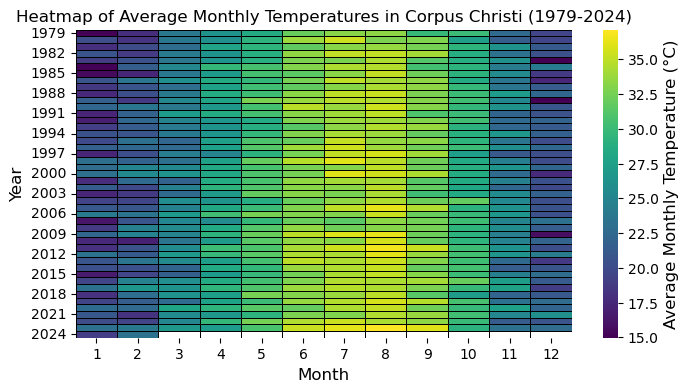

In [258]:
plt.figure(figsize=(8, 4)) 
# Pivot the data for heatmap
# heatmap_data = combined_df.pivot(index='year', columns='month', values='tmax')
heatmap_data = combined_df.pivot_table(index='year', columns='month', values='tmax', aggfunc='mean')

# Set the figure size
# plt.figure(figsize=(12, 8))

# Create the heatmap
heatmap = sns.heatmap(heatmap_data, cmap="viridis", linewidths=0.5, linecolor='black')

# Set labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.title('Heatmap of Average Monthly Temperatures in Corpus Christi (1979-2024)')
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Average Monthly Temperature (°C)', fontsize=12)
plt.savefig('monthly_temp_hm.png', dpi=300)

# Show the plot
plt.show()


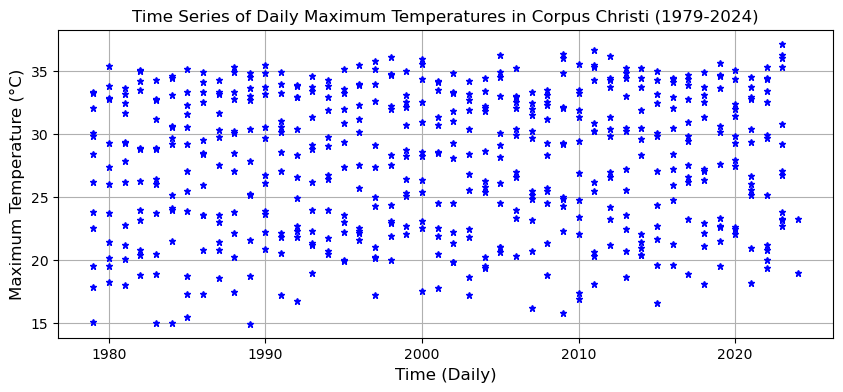

In [222]:
# Set the figure size
plt.figure(figsize=(10, 4))  # Adjust the width and height as needed

# Plot the time series of daily maximum temperatures with dots
plt.plot(monthly_averages['year'], monthly_averages['tmax'], marker='*', linestyle='', color='blue', markersize=5)
plt.xlabel('Time (Daily)', fontsize=12)
plt.ylabel('Maximum Temperature (°C)', fontsize=12)
plt.title('Time Series of Daily Maximum Temperatures in Corpus Christi (1979-2024)')
plt.grid(True)  # Add grid lines if needed
# plt.savefig('daily_temperatures.png', dpi=300)
plt.show()


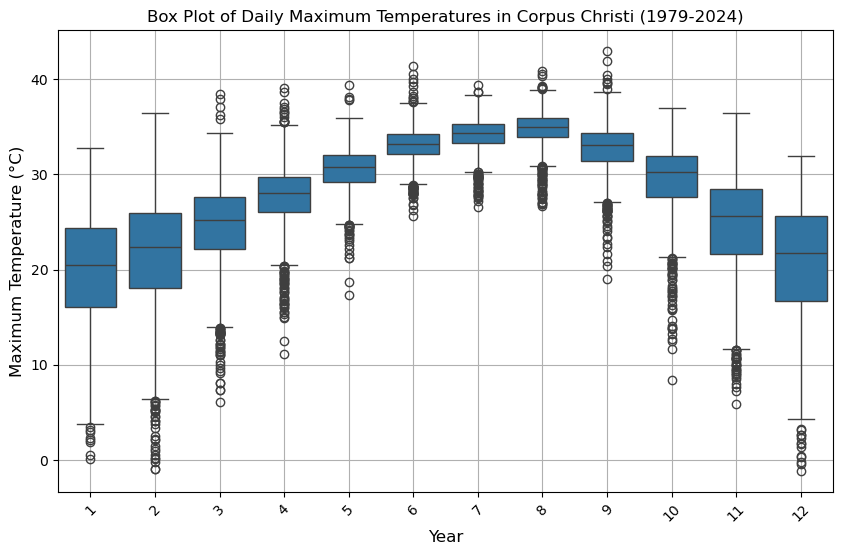

In [219]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='tmax', data=combined_df)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Maximum Temperature (°C)', fontsize=12)
plt.title('Box Plot of Daily Maximum Temperatures in Corpus Christi (1979-2024)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


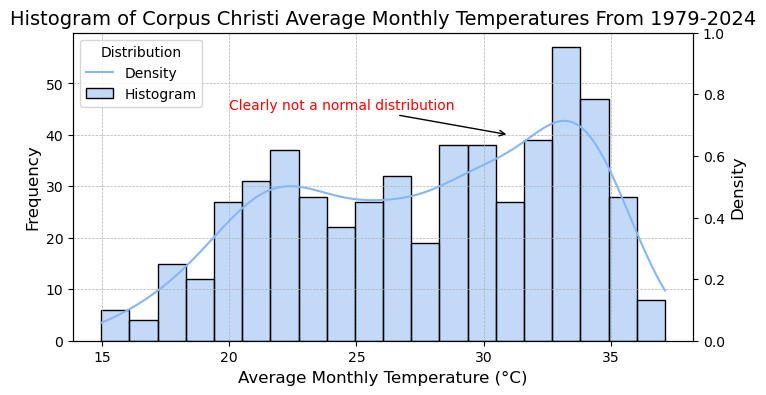

In [257]:
# Sample data (Assuming you have defined 'monthly_averages' somewhere in your code)

# Set color scheme
colors = sns.color_palette("Blues", n_colors=20)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4)) 
sns.histplot(monthly_averages['tmax'], kde=True, bins=20, ax=ax, color='#87B6F3')

# Customize the plot
ax.set_title('Histogram of Corpus Christi Average Monthly Temperatures From 1979-2024', fontsize=14)
ax.set_xlabel('Average Monthly Temperature (°C)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.legend(['Density', 'Histogram'], title='Distribution', loc='best', fontsize=10)

# Annotate with arrow
ax.annotate('Clearly not a normal distribution', 
            xy=(31, 40), 
            xytext=(20, 45),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            fontsize=10, color='red')

fig.patch.set_facecolor('white')

# Create a twin Axes for the density plot
ax2 = ax.twinx()
ax2.set_ylabel('Density', fontsize=12)
plt.yticks(fontsize=10)

# Save the plot
plt.savefig('monthly_temp_hist.png', dpi=300)

plt.show()


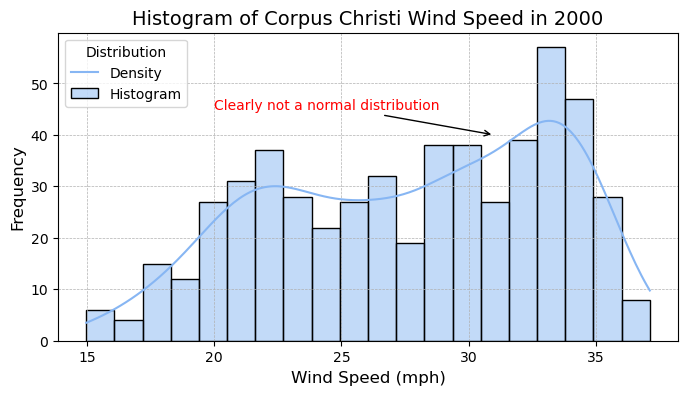

In [255]:


# Sample data
# Assuming you have defined 'monthly_averages' somewhere in your code

# Set color scheme
colors = sns.color_palette("Blues", n_colors=20)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4)) 
sns.histplot(monthly_averages['tmax'], kde=True, bins=20, ax=ax, color='#87B6F3')

# Customize the plot
ax.set_title('Histogram of Corpus Christi Wind Speed in 2000', fontsize=14)
ax.set_xlabel('Wind Speed (mph)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.legend(['Density', 'Histogram'], title='Distribution', loc='best', fontsize=10)

# Annotate with arrow
ax.annotate('Clearly not a normal distribution', 
            xy=(31, 40), 
            xytext=(20, 45),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            fontsize=10, color='red')

fig.patch.set_facecolor('white')
plt.show()


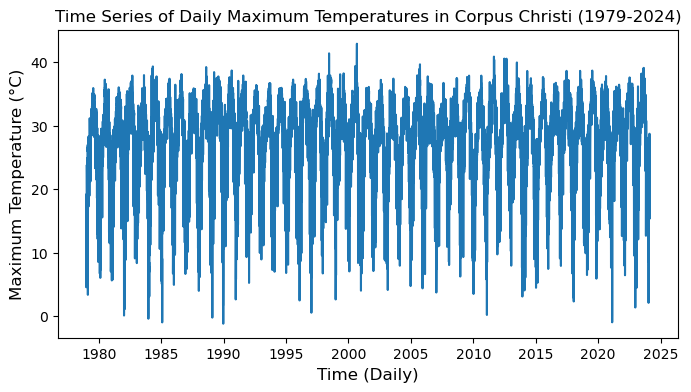

In [259]:
# Set the figure size
plt.figure(figsize=(8, 4))  # Adjust the width and height as needed

# Plot the time series of daily maximum temperatures
plt.plot(combined_df['time'], combined_df['tmax'])
plt.xlabel('Time (Daily)', fontsize=12)
plt.ylabel('Maximum Temperature (°C)', fontsize=12)
plt.title('Time Series of Daily Maximum Temperatures in Corpus Christi (1979-2024)')
plt.savefig('daily_temperatures.png', dpi=300)
plt.show()


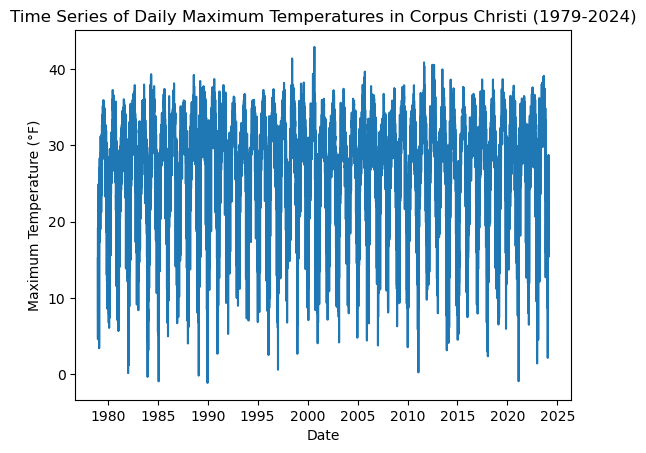

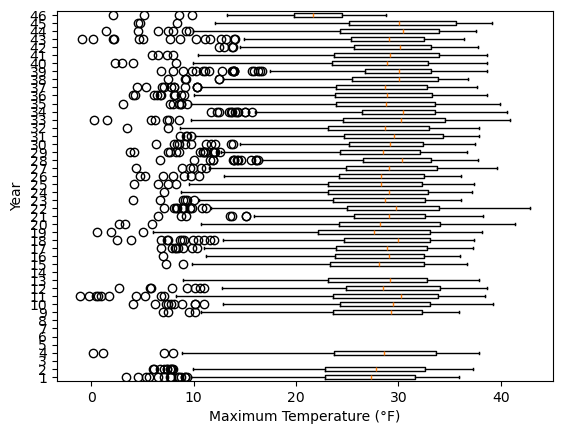

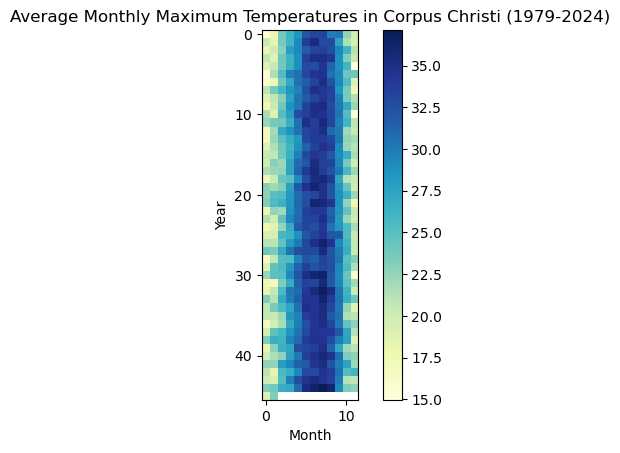

In [179]:
# Plot the time series of daily maximum temperatures
plt.plot(combined_df['time'], combined_df['tmax'])
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°F)')
plt.title('Time Series of Daily Maximum Temperatures in Corpus Christi (1979-2024)')
plt.show()

# Create a boxplot of monthly maximum temperatures for each year
year_data_list = []
for idx, year_data in combined_df.groupby('year'):
    year_data_list.append(year_data['tmax'].tolist())
plt.boxplot(year_data_list, vert=False)
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Year')
plt.show()

# Create a heatmap of monthly average temperatures across years
pivot_table = combined_df.pivot_table(index='year', columns='month', values='tmax', aggfunc='mean')
plt.imshow(pivot_table, cmap='YlGnBu')
plt.colorbar()
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Average Monthly Maximum Temperatures in Corpus Christi (1979-2024)')
plt.show()


In [180]:
corpus_christi_2023 = combined_df[combined_df['year'] == 2023]
corpus_christi_2023

time       tmax  year  month
16071 2023-01-01  26.234182  2023      1
16072 2023-01-02  27.642601  2023      1
16073 2023-01-03  29.201973  2023      1
16074 2023-01-04  27.462809  2023      1
16075 2023-01-05  26.812136  2023      1
...          ...        ...   ...    ...
16431 2023-12-27  23.548571  2023     12
16432 2023-12-28  18.157930  2023     12
16433 2023-12-29  18.773977  2023     12
16434 2023-12-30  22.216175  2023     12
16435 2023-12-31  24.443119  2023     12

[365 rows x 4 columns]

In [201]:
hot_days = combined_df[combined_df['tmax'] > 40]
hot_days

time       tmax  year  month
7104  1998-06-14  41.397984  1998      6
7917  2000-09-04  41.876011  2000      9
7918  2000-09-05  42.911469  2000      9
11927 2011-08-28  40.883347  2011      8
11934 2011-09-04  40.397217  2011      9
12230 2012-06-26  40.569832  2012      6
12294 2012-08-29  40.555191  2012      8
12295 2012-08-30  40.327530  2012      8

In [182]:
# Check for missing values
print(combined_df.isnull().sum())

time      0
tmax     24
year      0
month     0
dtype: int64


In [36]:
# Check for duplicate entries
print(combined_df.duplicated().sum())

0


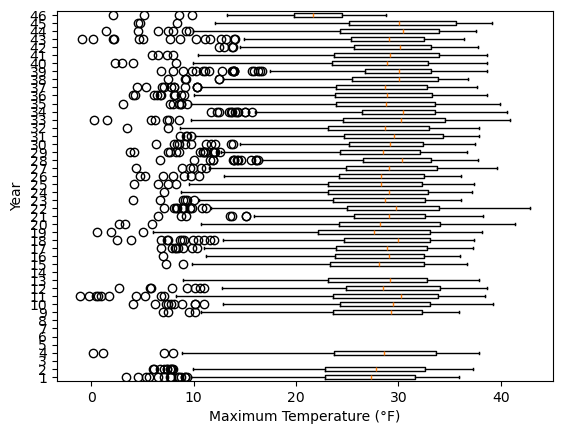

In [50]:
year_data_list = []
for idx, year_data in combined_df.groupby('year'):
    year_data_list.append(year_data[0].tolist())
plt.boxplot(year_data_list, vert=False)
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Year')
plt.show()



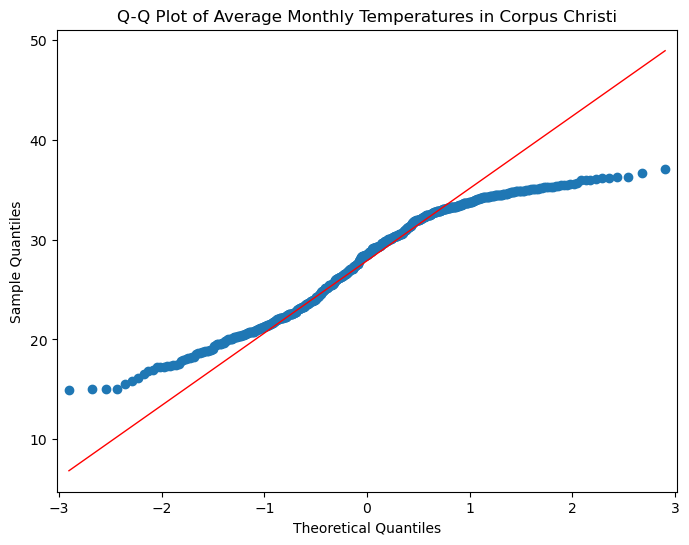

In [280]:
# Extract the average monthly temperatures
monthly_temps = monthly_averages['tmax']

# Generate the Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(monthly_temps, line='q', ax=ax)  # 'q' for 45-degree line
plt.title('Q-Q Plot of Average Monthly Temperatures in Corpus Christi')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Customize the appearance of the data points and the line
ax.get_lines()[1].set_color('black')   # Change color of the line
ax.get_lines()[1].set_linewidth(1)   # Change linewidth of the line
ax.get_children()[1].set_markersize(3)   # Change size of data points
ax.get_children()[1].set_marker('')     # Change marker style of data points
ax.get_children()[1].set_color('red')   # Change color of data points

plt.show()


<Figure size 1000x800 with 0 Axes>

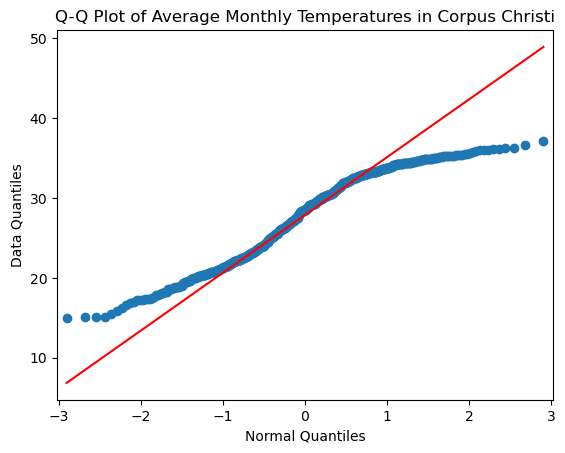

In [289]:
# Extract the average monthly temperatures
monthly_temps = monthly_averages['tmax']

# Set the figure size
plt.figure(figsize=(10, 8))

# Generate the Q-Q plot
sm.qqplot(monthly_temps, line='q')
plt.title('Q-Q Plot of Average Monthly Temperatures in Corpus Christi')
plt.xlabel('Normal Quantiles')
plt.ylabel('Data Quantiles')

plt.show()


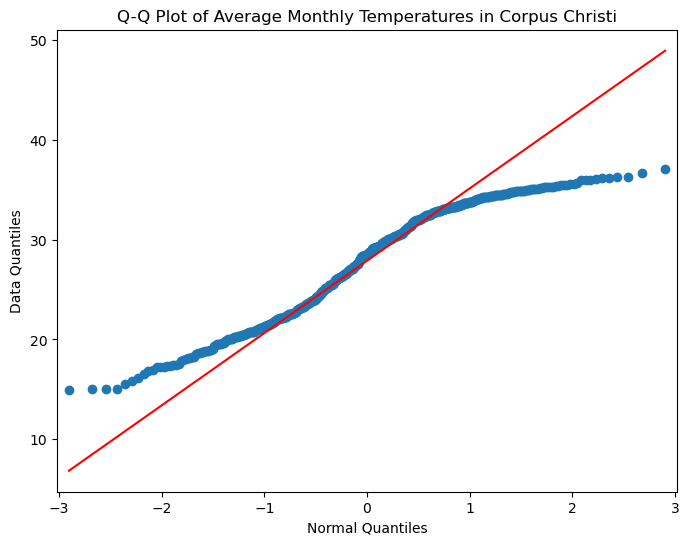

In [291]:
# Extract the average monthly temperatures
monthly_temps = monthly_averages['tmax']

# Generate the Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(monthly_temps, line='q', ax=ax)  # 'q' for 45-degree line
plt.title('Q-Q Plot of Average Monthly Temperatures in Corpus Christi')
plt.xlabel('Normal Quantiles')
plt.ylabel('Data Quantiles')
plt.savefig('qq_plot.png', dpi=300)

# Customize the appearance of the data points
# ax.get_children()[1].set_color('black')   # Change color of data points

plt.show()


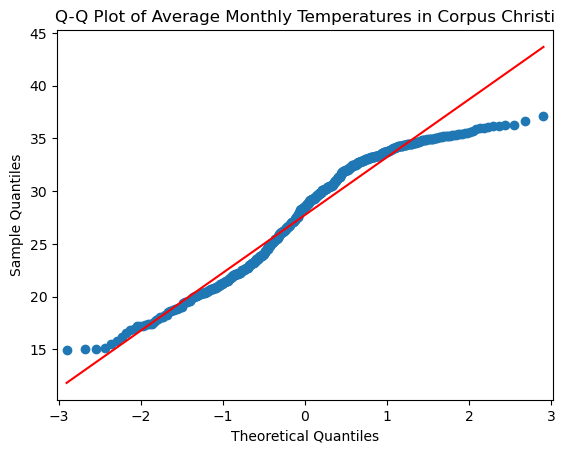

In [260]:
# Extract the average monthly temperatures
monthly_temps = monthly_averages['tmax']

# Generate the Q-Q plot
sm.qqplot(monthly_temps, line='s')
plt.title('Q-Q Plot of Average Monthly Temperatures in Corpus Christi')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [188]:
monthly_temps = monthly_averages['tmax']  # Assuming your data is in this column
stat, p_value = stats.shapiro(monthly_temps)

print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p_value)


Shapiro-Wilk test statistic: 0.9501159722265888
p-value: 1.4825203176848604e-12


In [67]:

# Assuming monthly_averages is a Pandas DataFrame
monthly_averages.to_csv("monthly_averages.csv", index=False)

In [189]:
# Perform Spearman's Rank Correlation
corr, p_value = stats.spearmanr(monthly_temps)

# Print the results
print(f'Spearman correlation coefficient: {corr}')
print(f'P-value: {p_value}')

ValueError: `spearmanr` needs at least 2 variables to compare